# AIM
Parameters for Multimode experiments
NOTE: I am getting number of layers from fig 2a of https://arxiv.org/pdf/2111.06414.pdf

### Part 1
This notebook just generates the ECD parameters (the angles for conditional displacement and qubit rotations). It assumes that we can enact conditional displacement gates and qubit rotation gates. What we need though are the angles through which we can prepare distance fock states in the cavity

### Part 2
Given the param in part 1, in this part we test them by doing unitary time evolution of ECD gates

### 1. Part 1

In [1]:
import sys 
parent_path = r'C:\Users\Tanay\Documents\Eesh'
sys.path.append(parent_path)
sys.path.append(parent_path + r'\ECD_control')


In [2]:
# from ECD_control import ECD_optimization
# from ECD_control import ECD_pulse_construction

import numpy as np
import qutip as qt 
sys.path.append(parent_path + r'\multimode_ecd\Echoed Conditional Displacements\Single Mode\class_description\Old Classes')
from ECD_batch_optimizerV1 import BatchOptimizer
from ECD_control.ECD_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


Need tf version 2.3.0 or later. Using tensorflow version: 2.15.0


Need tf version 2.3.0 or later. Using tensorflow version: 2.15.0



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1093362784944244408
 xla_global_id: -1]

In [3]:
# Hilbert space dimension size
N =10

In [4]:
# Set of states 
z_p = qt.basis(N,0) 
z_n = qt.basis(N,1)
x_p = 1/np.sqrt(2) * (z_p + z_n)
x_n = 1/np.sqrt(2) * (z_p - z_n)
y_p = 1/np.sqrt(2) * (z_p + 1.0j * z_n)
y_n = 1/np.sqrt(2) * (z_p - 1.0j * z_n)

init_states = [z_p, z_n, x_p, x_n, y_p, y_n]

#construct unitary 
diag_array = np.diag([1 for i in range(N)])
diag_array[0, 0] = 0
diag_array[1, 1] = 0
diag_array[0, 1] = 1
diag_array[1, 0] = 1
targ_unitary = diag_array

fin_states = [qt.Qobj(targ_unitary * init_state) for init_state in init_states]

In [5]:
# qubit x oscillator tensor product 
init_states = [qt.tensor(qt.basis(2,0), state) for state in init_states]
fin_states = [qt.tensor(qt.basis(2,0), state) for state in fin_states]

In [28]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
'N_blocks' : 8, #circuit depth
'N_multistart' : 10, #Batch size (number of circuit optimizations to run in parallel)
'epochs' : 100, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.995, #terminal fidelitiy
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'initial_states' : init_states, #qubit tensor oscillator, start in |g> |0>
'target_states' : fin_states, #end in |e> |target>.
'name' : 'Gate Xpi', #name for printing and saving
'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
}


#note: optimizer includes pi pulse in every ECD step. However, final ECD step is implemented 
#in experiment as a displacement since the qubit and oscillator should be disentangled at this point.
#So, we ask the optimizer to end in |e> |target> instead of |g>|target>.

In [29]:
#create optimization object. 
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()

None
Tensor("alphas:0", shape=(1, 10), dtype=complex64)
Tensor("alphas:0", shape=(8, 10), dtype=complex64)
optimization_type: state transfer
N_multistart: 10
N_blocks: 8
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 100
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Gate Xpi
comment: 
user_angles: None
N_cav: 10
filename: Gate Xpi.h5

Best circuit parameters found:
betas:         [-0.77387+2.53472j  0.06699-2.89249j -0.06165+1.79477j  0.02952+0.04595j
 -1.87742-0.02398j -2.771  +0.90607j -0.03696-0.19029j -0.01695-0.07469j]
alphas:        [0.+0.j]
phis (deg):    [   0.        -3.08622  108.94694   44.13299   -8.35034  -44.99596
  166.89552 -100.06098]
thetas (deg):  [ -1.27302 -87.4215  111.11777 -82.68511  88.83654  13.91371 -56.46133
 -19.05832]
Max Fidelity:  0.089567




In [30]:
#run optimizer.
opt.optimize()

Start time: 2024-03-01 15:19:47
 Epoch: 100 / 100 Max Fid: 0.989883 Avg Fid: 0.931662 Max dFid: 0.000117 Avg dFid: 0.000013 Elapsed time: 0:00:16.848151 Remaing time: 0:00:00168550

Optimization stopped.  Reached maximum number of epochs. Terminal fidelity not reached.

optimization_type: state transfer
N_multistart: 10
N_blocks: 8
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 100
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Gate Xpi
comment: 
user_angles: None
N_cav: 10
filename: Gate Xpi.h5

Best circuit parameters found:
betas:         [ 0.51304+0.50522j  0.81844-0.16665j -0.58785-0.05145j  1.77356+0.78442j
  1.50016-1.22616j -0.97107+0.30907j  0.36824+0.62556j  0.00065-0.00065j]
alphas:        [0.+0.j]
phis (deg):    [  0.       90.42451  89.91505  90.62346 -89.75214 -89.91718 -89.88634
   0.01908]
thetas (deg):  [ 90.202   -71.57132  94.94186 -44.14954  -8.63539 -68.75

'2024-03-01 15:19:47'

In [31]:
#can print info, including the best circuit found.
opt.print_info() 

optimization_type: state transfer
N_multistart: 10
N_blocks: 8
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 100
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Gate Xpi
comment: 
user_angles: None
N_cav: 10
filename: Gate Xpi.h5

Best circuit parameters found:
betas:         [ 0.51304+0.50522j  0.81844-0.16665j -0.58785-0.05145j  1.77356+0.78442j
  1.50016-1.22616j -0.97107+0.30907j  0.36824+0.62556j  0.00065-0.00065j]
alphas:        [0.+0.j]
phis (deg):    [  0.       90.42451  89.91505  90.62346 -89.75214 -89.91718 -89.88634
   0.01908]
thetas (deg):  [ 90.202   -71.57132  94.94186 -44.14954  -8.63539 -68.7534   79.58158
  89.72924]
Max Fidelity:  0.989882




### Saving angles: My way (without using h5 files, just the standard txt)

In [34]:
fname = r'Data\20240301_Xpi.txt'
betas = opt.best_circuit()['betas']
phis = opt.best_circuit()['phis']
thetas = opt.best_circuit()['thetas']

params = [np.real(betas), np.imag(betas), phis, thetas]
for i in range(len(params)):
    params[i] = [float(k) for k in params[i]]

a_file = open(fname, "w")
np.savetxt(a_file, params)
a_file.close()

# 2. Part 2

In [6]:
from ECD_control.ECD_pulse_construction.ECD_pulse_construction import *

##### Getting the Drive

In [7]:
# sys.path.append(parent_path + r'\multimode_ecd\Echoed Conditional Displacements\Single Mode\class_description')
# from Simplified_ECD_pulse_constructionV2 import *

In [9]:
# Import Data 
import numpy as np
fname = r'Data\20240301_Xpi.txt'
b_file = open(fname, "r")
params = np.loadtxt(b_file)
print(params)

[[ 5.13040900e-01  8.18435788e-01 -5.87849796e-01  1.77355635e+00
   1.50015819e+00 -9.71071601e-01  3.68243933e-01  6.53885829e-04]
 [ 5.05223155e-01 -1.66646674e-01 -5.14525399e-02  7.84418821e-01
  -1.22616458e+00  3.09065193e-01  6.25564754e-01 -6.47727982e-04]
 [ 0.00000000e+00  1.57820535e+00  1.56931376e+00  1.58167768e+00
  -1.56647038e+00 -1.56935084e+00 -1.56881261e+00  3.33070755e-04]
 [ 1.57432199e+00 -1.24915528e+00  1.65704799e+00 -7.70554781e-01
  -1.50716066e-01 -1.19997311e+00  1.38896060e+00  1.56607080e+00]]


In [10]:
import cmath
betas = np.asarray([complex(params[0][i], params[1][i]) for i in range(len(params[0]))])
phis = np.array([params[2]])
thetas = np.array([params[3]])

#the parameters in our circuit. Can be user defined, or loaded from the result of an ECD optimization.

print('betas:' + str(betas))
print('phis:' + str(phis))
print('thetas:' + str(thetas))

betas:[ 5.13040900e-01+5.05223155e-01j  8.18435788e-01-1.66646674e-01j
 -5.87849796e-01-5.14525399e-02j  1.77355635e+00+7.84418821e-01j
  1.50015819e+00-1.22616458e+00j -9.71071601e-01+3.09065193e-01j
  3.68243933e-01+6.25564754e-01j  6.53885829e-04-6.47727982e-04j]
phis:[[ 0.00000000e+00  1.57820535e+00  1.56931376e+00  1.58167768e+00
  -1.56647038e+00 -1.56935084e+00 -1.56881261e+00  3.33070755e-04]]
thetas:[[ 1.57432199 -1.24915528  1.65704799 -0.77055478 -0.15071607 -1.19997311
   1.3889606   1.5660708 ]]


## Experiment parameters

### Cavity Displacement

In [11]:
gain_to_alpha = 0.001148213 #  This is for per 1us, 1 DAC gain constant pulse

#converting this to gaussian  but need to find amplitude given sigma 
cav_sigma = int(30*1.5) # ns
cav_chop = 4
# Area under a gaussian Amplitude*SD/0.3989
constant_gain_dac = 1
constant_width = 1e+3 # ns
gauss_amp_dac = (constant_gain_dac * constant_width) / (np.sqrt(2*np.pi) * cav_sigma) # amplitude of gaussian in dac units to realize alpha = gain_to_alpha
gauss_amp_dac_alpha1 = gauss_amp_dac / gain_to_alpha # for alpha == 1

In [12]:
gauss_amp_dac_alpha1

7721.02737812647

In [13]:
1/gain_to_alpha # with constant pulse of 1e+3 ns, need this much dac amp to realize alpha ==1

870.918549084534

In [14]:
storage_params = {
        "chi_kHz": 1e+3 * -0.2562553500034, #dispersive shift in Khz
        "chi_prime_Hz": 0, #second order dispersive shift
        "Ks_Hz": 0, #Kerr correction not yet implemented.
        "unit_amp": gauss_amp_dac_alpha1, #DAC unit amp of gaussian displacement to alpha=1.
        "sigma": cav_sigma, #oscillator displacement sigma (ns)
        "chop": cav_chop, #oscillator displacement chop (number of stds. to include in gaussian pulse)
    }

### Qubit Pi Pulse

In [15]:
#a= 10
#Our cavity and qubit. When using pulse construction on the FPGA, these objects can be loaded, and 
#Here, we are making a "FakeCavity" and a "FakeQubit" with parameters found from experimental calibrations.

pi_amp_dac = 17410

qubit_params = {'unit_amp': pi_amp_dac, # ampltidue of gaussian pi pulse
                'sigma': 40, # ns 
                'chop': 4} #parameters for qubit pi pulse.

#calculating conversion between qubit DAC units and MHz (Omega)
pi = rotate(np.pi, phi=0, sigma=qubit_params['sigma'], chop=qubit_params['chop'], dt=1)
#Omega_m = np.real(np.max(pi))/qubit_params['unit_amp']

#creating the "Fake storage" and "Fake qubit"
storage = FakeStorage(**storage_params)
qubit = FakeQubit(**qubit_params)

#The maximum displacement used during the ECD gates.
alpha_CD = 2
#Small delay to insert between oscillator and qubit pulses
buffer_time = 0

In [16]:
1e+3 * np.max(pi) / qubit_params['unit_amp'] / (2 * np.pi) * 30000

(5.061413675331143+0j)

In [17]:
qubit.Omega_m_MHz

0.00016871378917770476

In [18]:
#From these calibrations, the storage and qubit objects calculate the
#conversion between DAC amplitude, and drive amplitude in MHz.
#so, [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz 
#and [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz.
#These parameters also represent the maximum drive amplitude,
#since the DAC max amplitude is 1# (assuming amplifiers don't saturate.)

#EG: Our max amplitude is 30000 Dac units
max_amp = 30000
print('Maximum oscillator drive amplitude: |epsilon|/2*pi < %.3f MHz' % (storage.epsilon_m_MHz*max_amp))
print('Maximum qubit drive amplitude: |Omega|/2*pi < %.3f MHz' % (qubit.Omega_m_MHz*max_amp))


Maximum oscillator drive amplitude: |epsilon|/2*pi < 6.454 MHz
Maximum qubit drive amplitude: |Omega|/2*pi < 5.061 MHz


In [19]:
%load_ext autoreload
%autoreload 2

In [20]:
type(phis)

numpy.ndarray

In [21]:
#generating the conditional displacement circuit.
#set 'chi_prime_correction = True' to correct for linear part of chi'
#final_disp = True will implement final ECD gate as a displacement
pulse_dict = conditional_displacement_circuit(betas, phis, thetas, storage, qubit,
                     alpha_CD,buffer_time=buffer_time, kerr_correction = False, chi_prime_correction=True, final_disp=True, pad=True)#, output = True)
cavity_dac_pulse, qubit_dac_pulse, = pulse_dict['cavity_dac_pulse'], pulse_dict['qubit_dac_pulse']



C:\Anaconda3\envs\Lib\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


In [22]:
a = np.array([[[1,2]],[[2,2]]])
np.concatenate(a, axis = 0)

array([[1, 2],
       [2, 2]])

In [23]:
total_time = 0 
for arr in pulse_dict['qubit_dac_gauss']: 
    if arr[0] != 0: 
        total_time += qubit.pulse.chop * arr[1]
    else: 
        total_time += arr[1]

total_time

KeyError: 'qubit_dac_gauss'

In [51]:
total_time = 0 
for arr in pulse_dict['qubit_dac_gauss']: 
    if arr[0] != 0: 
        total_time += storage.displace.chop * arr[1]
    else: 
        total_time += arr[1]

total_time

(8808+0j)

Now testing whether aligns with normal pulse

In [52]:
qubit_dac_pulse_from_gauss = []

for pulse_bite in pulse_dict['qubit_dac_gauss']: 
    amp = pulse_bite[0]
    sigma = int(pulse_bite[1].real)

    if amp ==0: 
        full_pulse = np.zeros(sigma)
    else: 
        dr, di  = qubit.pulse.make_wave(pad=False) # sigma already loaded 
        pi_pulse = dr + 1.0j * di
        full_pulse = amp * pi_pulse

    qubit_dac_pulse_from_gauss.append(list(full_pulse))
    
qubit_dac_pulse_from_gauss = np.concatenate(qubit_dac_pulse_from_gauss)

C:\Anaconda3\envs\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Anaconda3\envs\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


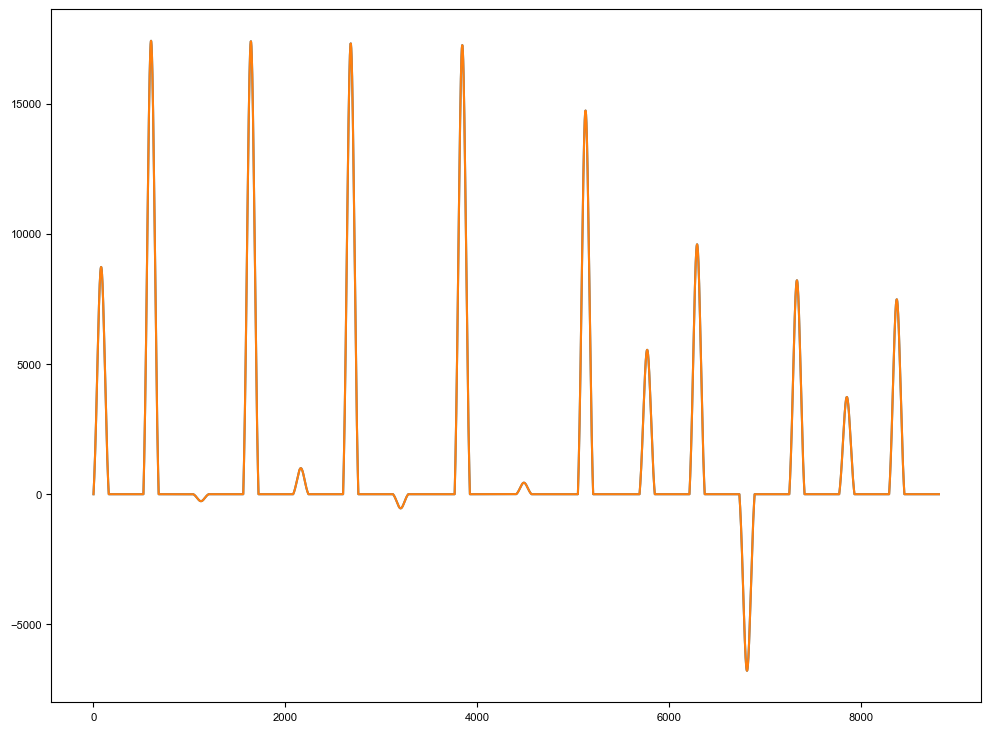

In [53]:
plt.plot(qubit_dac_pulse)
plt.plot(qubit_dac_pulse_from_gauss)

In [54]:
cavity_dac_pulse_from_gauss = []

for pulse_bite in pulse_dict['cavity_dac_gauss']: 
    amp = pulse_bite[0]
    sigma = int(pulse_bite[1].real)

    if amp == 0: 
        full_pulse = np.zeros(sigma)
    else: 
        dr, di  = storage.displace.make_wave(pad=False) # sigma already loaded 
        disp_unit_pulse = dr + 1.0j * di
        full_pulse = amp * disp_unit_pulse

    cavity_dac_pulse_from_gauss.append(list(full_pulse))
cavity_dac_pulse_from_gauss = np.concatenate(cavity_dac_pulse_from_gauss)

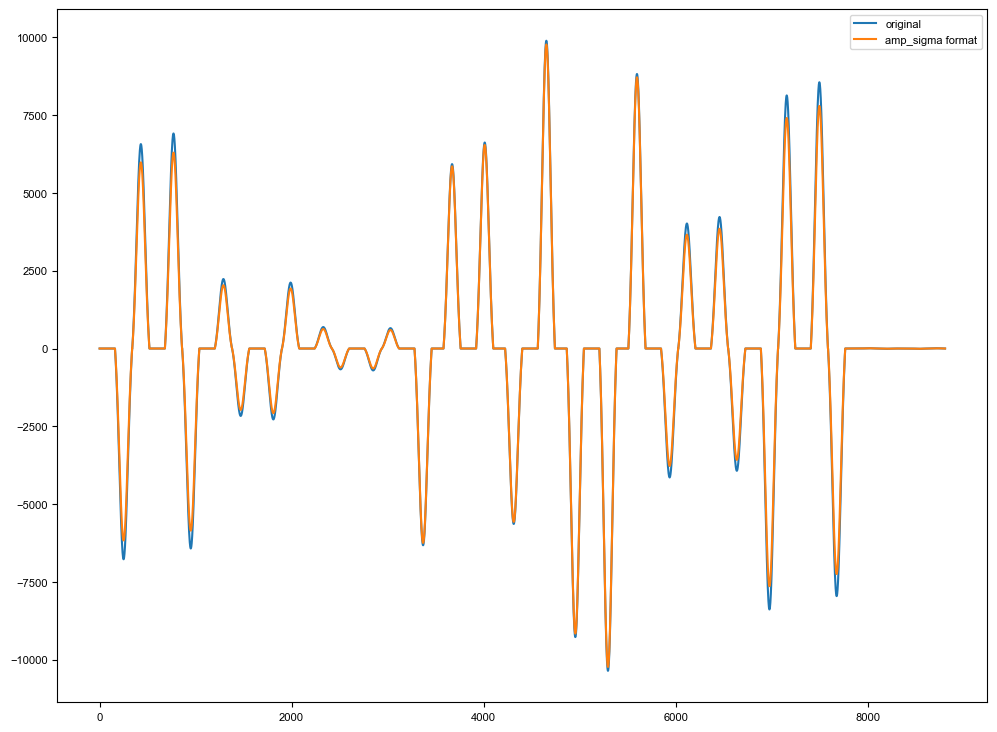

In [55]:
plt.plot(np.real(cavity_dac_pulse), label = 'original')
plt.plot(np.real(cavity_dac_pulse_from_gauss), label = 'amp_sigma format')
plt.legend()

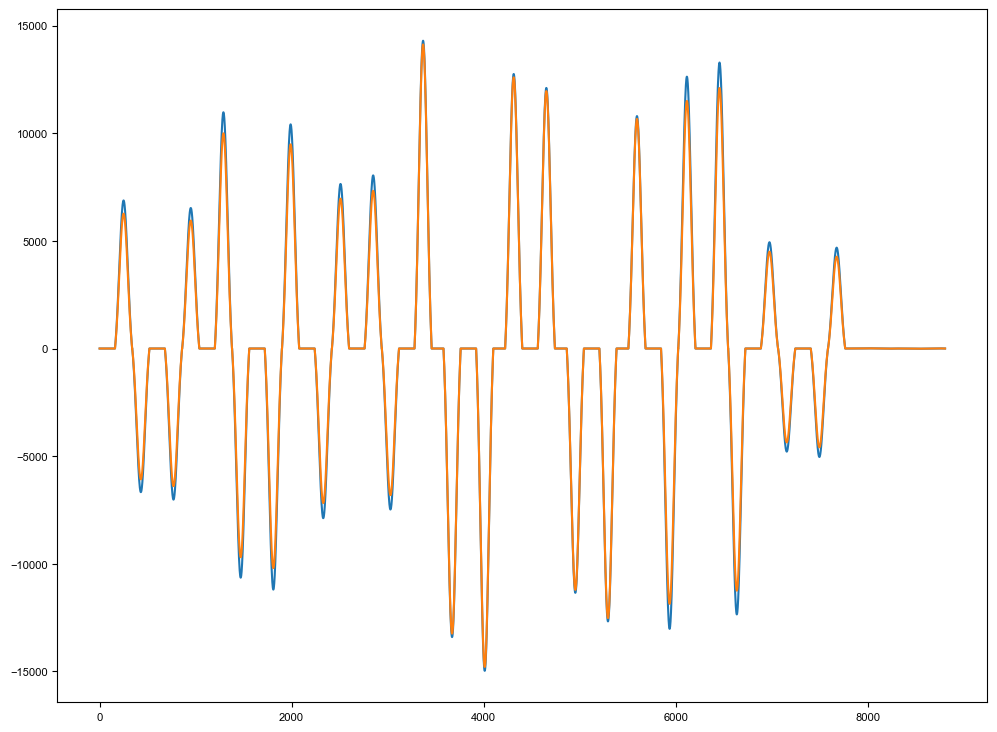

In [56]:
plt.plot(np.imag(cavity_dac_pulse))
plt.plot(np.imag(cavity_dac_pulse_from_gauss))

### Back to Regular code

In [24]:
cavity_dac_pulse_GHz = (2*np.pi)*(10**(-3))*storage.epsilon_m_MHz*cavity_dac_pulse #convert from DAC to Mhz to Ghz
qubit_dac_pulse_GHz = (2*np.pi)*10**(-3)*qubit.Omega_m_MHz*qubit_dac_pulse #convert from DAC to Mhz to Ghz

Text(0, 0.5, 'Ghz')

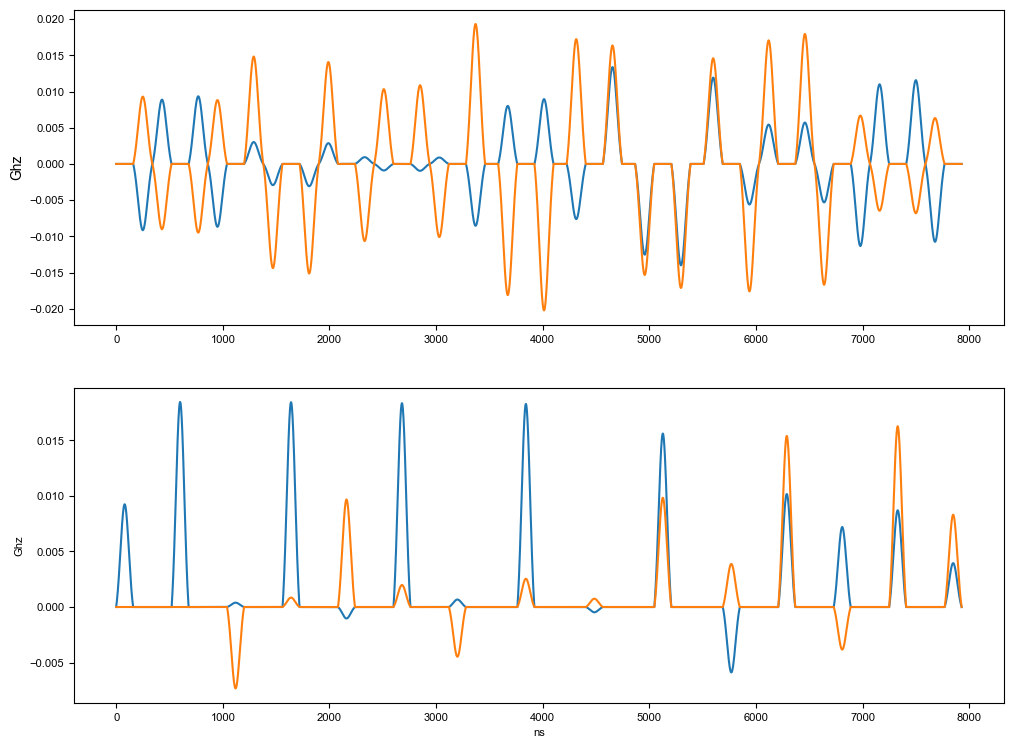

In [25]:
#plotting the pulse in GHz
fig, axs = plt.subplots(2,1)
axs[0].plot(np.real(cavity_dac_pulse_GHz))
axs[0].plot(np.imag(cavity_dac_pulse_GHz))
axs[0].set_ylabel('Ghz', fontsize = 10)
axs[1].plot(np.real(qubit_dac_pulse_GHz))
axs[1].plot(np.imag(qubit_dac_pulse_GHz))
plt.xlabel('ns')
plt.ylabel('Ghz')

In [26]:
max(qubit_dac_pulse_GHz)

(0.018453956126231155+0j)

In [27]:
np.abs(max(cavity_dac_pulse_GHz))

0.021125811764559403

##### Finding alpha(t)

In [28]:
def alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array, delta=0, alpha_init=0 + 0j):
    dt = 1
    alpha = np.zeros_like(epsilon_array)
    alpha[0] = alpha_init
    alpha[1] = alpha_init
    for j in range(1, len(epsilon_array) - 1):
        alpha[j + 1] = (
                2*
                 dt
                * (
                    -1j * delta# * alpha[j]
                    #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                    #- (kappa / 2.0) * alpha[j]
                    - 1j * epsilon_array[j]
                )
                + alpha[j - 1])
    return alpha

In [29]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array =cavity_dac_pulse_GHz , delta=0, alpha_init=0 + 0j)
alpha_star = np.conjugate(alpha)

Text(0.5, 0, 'ns')

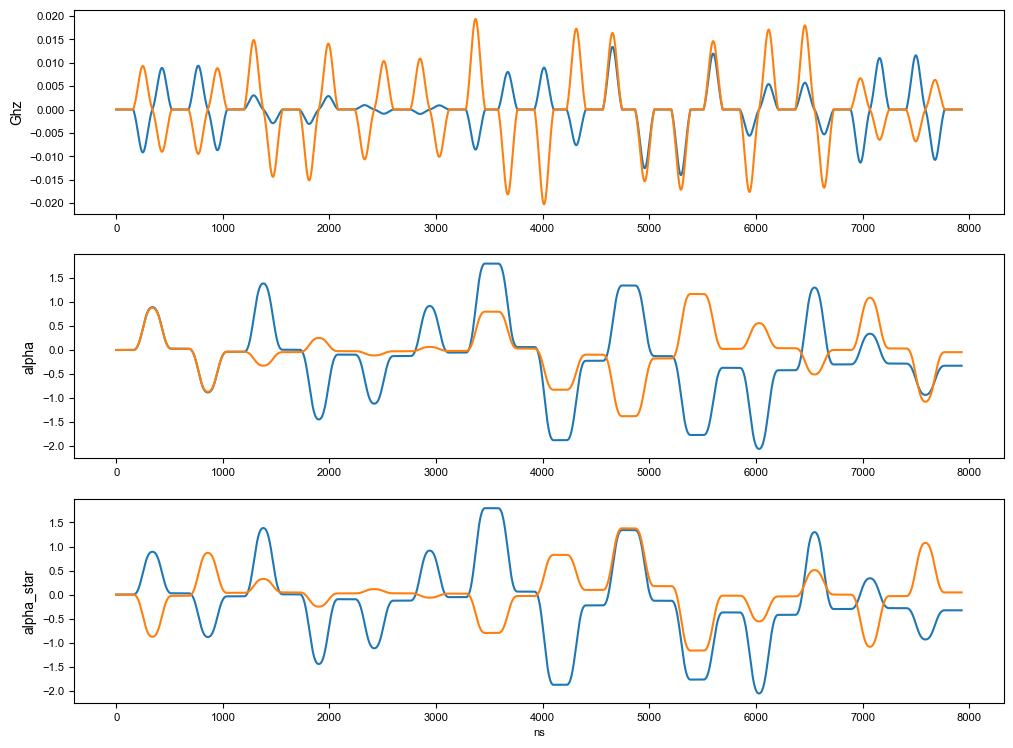

In [30]:
fig, axs = plt.subplots(3,1)
axs[0].plot(np.real(cavity_dac_pulse_GHz))
axs[0].plot(np.imag(cavity_dac_pulse_GHz))
axs[0].set_ylabel('Ghz', fontsize = 10)
axs[1].plot(np.real(alpha))
axs[1].plot(np.imag(alpha))
axs[1].set_ylabel('alpha', fontsize = 10)

axs[2].plot(np.real(alpha_star))
axs[2].plot(np.imag(alpha_star))
axs[2].set_ylabel('alpha_star', fontsize = 10)
plt.xlabel('ns')

In [138]:
pulse_fname = 'Data\20240301_Xpi_pulse'

with open(pulse_fname + '.npy', 'wb') as f:
    np.save(f, cavity_dac_pulse)
    np.save(f, qubit_dac_pulse)

In [139]:
with open(pulse_fname + '.npy', 'rb') as f:
    cavity_dac_pulse_ = np.load(f)
    qubit_dac_pulse_ = np.load(f)

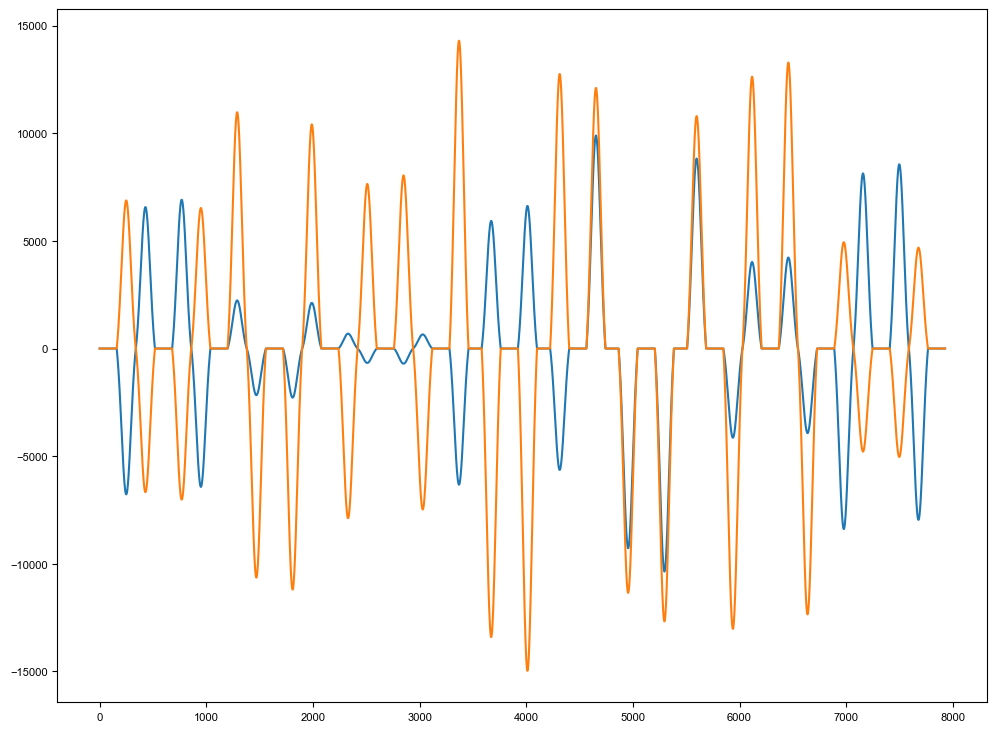

In [140]:
plt.plot(np.real(cavity_dac_pulse_))
plt.plot(np.imag(cavity_dac_pulse_))

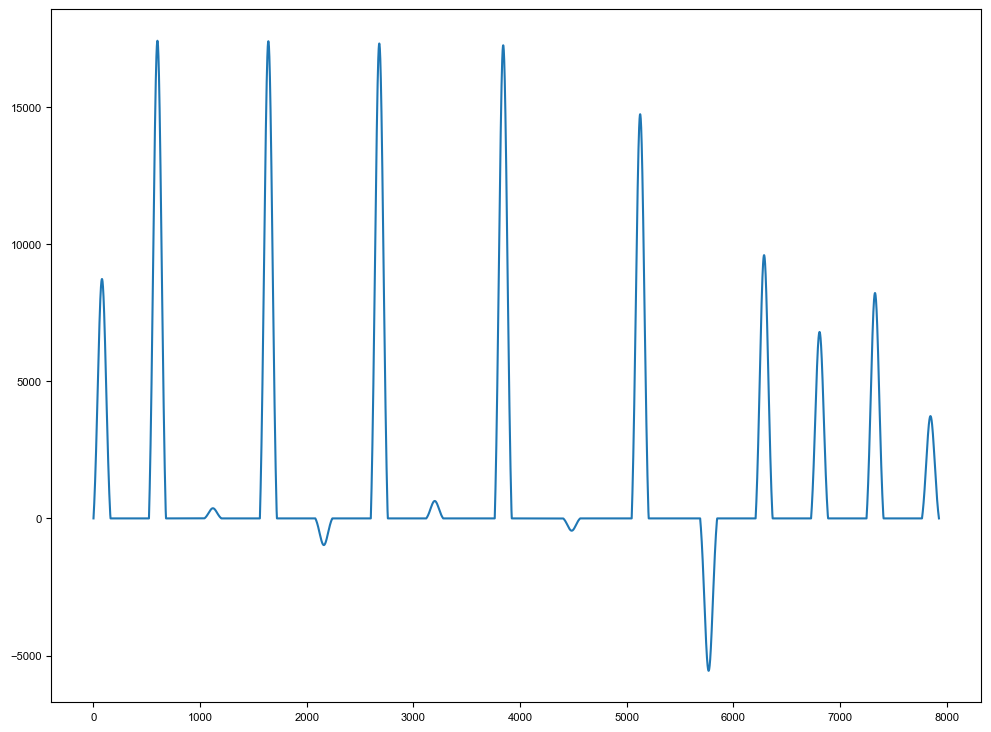

In [141]:
plt.plot(np.real(qubit_dac_pulse_))

# Qutip Simulation

In [37]:
from qutip import *
from qutip.control import *
from math import *

In [38]:
T = len(cavity_dac_pulse)
times = np.linspace(0, T, T) #1ns timesteps

## Displaced Frame simulation

In [39]:
n_c = 30  #number of levels in cavity
n_q = 2 #number of levels in qubit

#N = 1 #target cavity state

omega_c  = 5.26 *2*pi   #frequencies in GHz
omega_q = 6.65*2*pi
#K = -3.7*(10**(-6))*2*pi #cavity nonlinearity

#photon depenedent number shifts
chi = storage_params["chi_kHz"]*2*pi*(10**(-6)) #linear
chi_ = storage_params["chi_prime_Hz"]*(10**(-9)) #quadratic

##mode to mode coupling 
eta = 10**(-9)

In [40]:
# Creating identity, annhilitation/creation, num operators 
identity_q = qeye(n_q)
identity_c = qeye(n_c)

a_q = destroy(n_q)
a_c = destroy(n_c)

adag_q = create(n_q)
adag_c = create(n_c)

num_q = num(n_q)
num_c =  num(n_c)


c_ops = []

tlist = times




In [146]:
# Displace Frame hammy
H0_disp = tensor(identity_q,identity_c)#(chi/2)*tensor(sigmaz(),num_c)

In [147]:
# prepping time depedent hammys
alpha_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha])
H = [
#     H0_disp,
    [tensor(a_q, qeye(n_c)), np.conjugate(qubit_dac_pulse_GHz)], 
     [tensor(adag_q, qeye(n_c)), qubit_dac_pulse_GHz],
#         [a_q, qubit_imag], #convert from DAC to MHz to Ghz
#      [adag_q, qubit_real],
     [(chi/2)*tensor(sigmaz(), destroy(n_c)), alpha_star],
     [(chi/2)*tensor(sigmaz(), create(n_c)), alpha],
     #[(chi/2)*tensor(sigmaz(), qeye(n_c)), alpha_sq]
     ]

###### Qutip: Simulation

In [431]:
#states_filename = 'State_store_g0_g1_disp'

In [150]:
# Set of states 
z_p = qt.basis(n_c,0) 
z_n = qt.basis(n_c,1)
x_p = 1/np.sqrt(2) * (z_p + z_n)
x_n = 1/np.sqrt(2) * (z_p - z_n)
y_p = 1/np.sqrt(2) * (z_p + 1.0j * z_n)
y_n = 1/np.sqrt(2) * (z_p - 1.0j * z_n)

init_states = [z_p, z_n, x_p, x_n, y_p, y_n]

#construct unitary 
diag_array = np.diag([1 for i in range(n_c)])
diag_array[0, 0] = 0
diag_array[1, 1] = 0
diag_array[0, 1] = 1
diag_array[1, 0] = 1
targ_unitary = diag_array

#target states
fin_states = [qt.Qobj(targ_unitary * init_state) for init_state in init_states]

# qubit x oscillator tensor product 
init_states = [qt.tensor(qt.basis(2,0), state) for state in init_states]
fin_states = [qt.tensor(qt.basis(2,0), state) for state in fin_states]

In [154]:
for idx, psi0 in enumerate(init_states):
    
    opts = Options(store_states=False, store_final_state=True, nsteps = 5000)
    output = mesolve(H, psi0 , times, c_ops, [], options =opts)
    #qsave(output.states, states_filename)
    rho = output.states[-1]
    target_state = fin_states[idx]
    fidelity = rho.overlap(target_state)
    print('Fidelity is '+ str(fidelity*np.conjugate(fidelity)))

Fidelity is (0.00035309152910689+0j)
Fidelity is (0.0007442979798375129+0j)
Fidelity is (0.00011181882950955622+0j)
Fidelity is (0.00018064855638252514+0j)
Fidelity is (0.00013819970037418165+0j)
Fidelity is (0.0001673361074194152+0j)


In [433]:
target_state = tensor(basis(n_q,0), basis(n_c, 1))
fidelity = rho.overlap(target_state)
#print('Fidelity is '+ str(fidelity*fidelity.imag))

In [434]:
fidelity*np.conjugate(fidelity)

(0.9666617882932382+0j)

In [435]:
opt.best_fidelity()

0.9814024

In [436]:
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

In [437]:
def plot_populations_single_mode(output_states, figname, title):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig, axs = plt.subplots(2,1, figsize=(10,8))
    probs = []
    times = [k/1000 for k in range(len(output_states))]
    max_num_levels = 10 # to be shown on the plot
    
    #qubit grounded
    for i in range(max_num_levels):
        target = tensor(basis(n_q,0), basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[0].plot(times, pops, label = '|g,'+str(i)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        target = tensor(basis(n_q,1), basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[1].plot(times, pops, linestyle = '--',  label = '|e,'+str(i) +'>')

    axs[1].set_xlabel(r"Time ($\mu$s)", fontsize = 18)
    axs[1].set_ylabel("Populations", fontsize = 18)
    axs[0].set_ylabel("Populations", fontsize = 18)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[0].tick_params(axis = 'both', which = 'minor', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'minor', labelsize = '15')
#     axs[0].set_xticks(fontsize= 10)
#     axs[1].set_yticks(fontsize= 10)
#     axs[0].set_yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    #plt.legend(fontsize = '15')
    #fig.suptitle(title, fontsize = 15)
    plt.tight_layout()
    fig.savefig(figname, dpi = 1000)

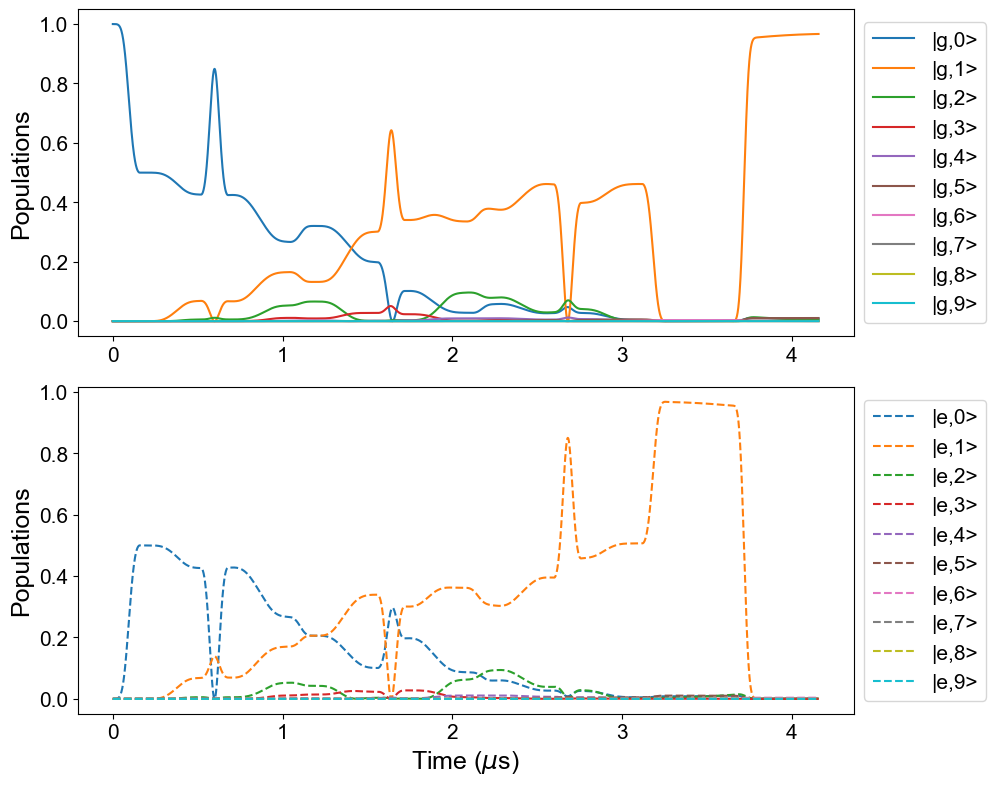

In [438]:
figname = "g0_g1"
data = qload(states_filename)
plot_populations_single_mode(data, figname, None)

## Lab Frame

In [41]:
n_c = 30  #number of levels in cavity
n_q = 2 #number of levels in qubit

#N = 1 #target cavity state

omega_c  = 5.26 *2*pi   #frequencies in GHz
omega_q = 6.65*2*pi
#K = -3.7*(10**(-6))*2*pi #cavity nonlinearity

#photon depenedent number shifts
chi = storage_params["chi_kHz"]*2*pi*(10**(-6)) #linear
chi_ = storage_params["chi_prime_Hz"]*(10**(-9)) #quadratic

##mode to mode coupling 
eta = 10**(-9)

In [42]:
# Creating identity, annhilitation/creation, num operators 
identity_q = qeye(n_q)
identity_c = qeye(n_c)

a_q = destroy(n_q)
a_c = destroy(n_c)

adag_q = create(n_q)
adag_c = create(n_c)

num_q = num(n_q)
num_c =  num(n_c)


c_ops = []

tlist = times




In [43]:
# Lab Frame hammy
H0_lab = -1*(chi/2)*tensor(sigmaz(),num_c)

In [44]:
# prepping time depedent hammys
H = [
#     H0_disp,
    H0_lab,
    [tensor(a_q, qeye(n_c)), np.conjugate(qubit_dac_pulse_GHz)], 
     [tensor(adag_q, qeye(n_c)), qubit_dac_pulse_GHz],
#         [a_q, qubit_imag], #convert from DAC to MHz to Ghz
#      [adag_q, qubit_real],
    [tensor(qeye(n_q), a_c), np.conjugate(cavity_dac_pulse_GHz)], 
     [tensor(qeye(n_q), adag_c), cavity_dac_pulse_GHz],
     #[(chi/2)*tensor(sigmaz(), qeye(n_c)), alpha_sq]
     ]

###### Qutip: Simulation

In [45]:
states_filename = 'State_store_g0_g1_disp'

In [49]:
# Set of states 
z_p = qt.basis(n_c,0) 
z_n = qt.basis(n_c,1)
x_p = 1/np.sqrt(2) * (z_p + z_n)
x_n = 1/np.sqrt(2) * (z_p - z_n)
y_p = 1/np.sqrt(2) * (z_p + 1.0j * z_n)
y_n = 1/np.sqrt(2) * (z_p - 1.0j * z_n)

init_states = [z_p, z_n, x_p, x_n, y_p, y_n]

#construct unitary 
diag_array = np.diag([1 for i in range(n_c)])
diag_array[0, 0] = 0
diag_array[1, 1] = 0
diag_array[0, 1] = 1
diag_array[1, 0] = 1
targ_unitary = diag_array

#target states
fin_states = [qt.Qobj(targ_unitary * init_state) for init_state in init_states]

# qubit x oscillator tensor product 
init_states = [qt.tensor(qt.basis(2,0), state) for state in init_states]
fin_states = [qt.tensor(qt.basis(2,0), state) for state in fin_states]

In [50]:
for idx, psi0 in enumerate(init_states):
    
    opts = Options(store_states=False, store_final_state=True, nsteps = 5000)
    output = mesolve(H, psi0 , times, c_ops, [], options =opts)
    #qsave(output.states, states_filename)
    rho = output.states[-1]
    target_state = fin_states[idx]
    fidelity = rho.overlap(target_state)
    print('Fidelity is '+ str(fidelity*np.conjugate(fidelity)))

Fidelity is (0.004304407119197339+0j)
Fidelity is (0.004941318968096858+0j)
Fidelity is (0.0037210621770267954+0j)
Fidelity is (0.0010300303223366046+0j)
Fidelity is (0.006679031574499591+0j)
Fidelity is (0.00025889767486331395+0j)


In [58]:
psi0 = tensor(basis(n_q,0), basis(n_c,1))
opts = Options(store_states=True, store_final_state=True, nsteps = 5000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
qsave(output.states, states_filename)
rho = output.states[-1]

In [63]:
target_state = tensor(basis(n_q,1), basis(n_c, 0))
fidelity = rho.overlap(target_state)
#print('Fidelity is '+ str(fidelity*fidelity.imag))

In [64]:
fidelity*np.conjugate(fidelity)

(0.9353160493215432+0j)

In [65]:
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

In [66]:
def plot_populations_single_mode(output_states, figname, title):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig, axs = plt.subplots(2,1, figsize=(10,8))
    probs = []
    times = [k/1000 for k in range(len(output_states))]
    max_num_levels = 15 # to be shown on the plot
    
    #qubit grounded
    for i in range(max_num_levels):
        target = tensor(basis(n_q,0), basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[0].plot(times, pops, label = '|g,'+str(i)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        target = tensor(basis(n_q,1), basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[1].plot(times, pops, linestyle = '--',  label = '|e,'+str(i) +'>')

    axs[1].set_xlabel(r"Time ($\mu$s)", fontsize = 18)
    axs[1].set_ylabel("Populations", fontsize = 18)
    axs[0].set_ylabel("Populations", fontsize = 18)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[0].tick_params(axis = 'both', which = 'minor', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'minor', labelsize = '15')
#     axs[0].set_xticks(fontsize= 10)
#     axs[1].set_yticks(fontsize= 10)
#     axs[0].set_yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    #plt.legend(fontsize = '15')
    #fig.suptitle(title, fontsize = 15)
    plt.tight_layout()
    fig.savefig(figname, dpi = 1000)

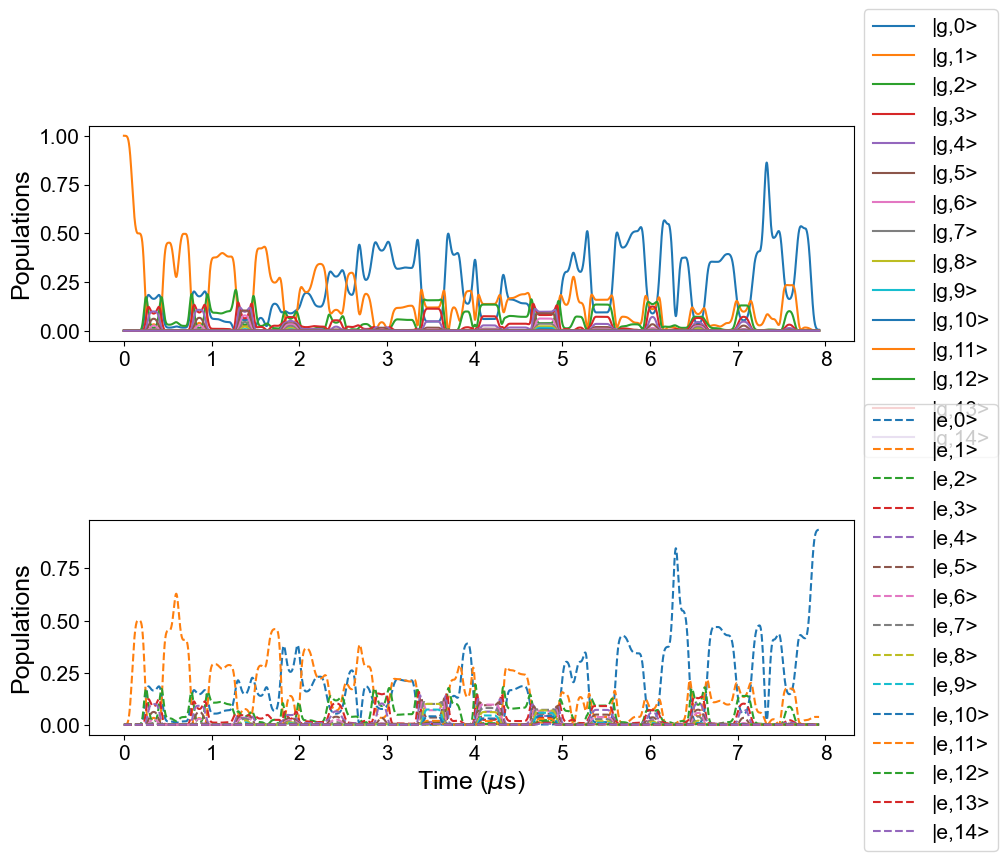

In [67]:
figname = "g0_g1"
data = qload(states_filename)
plot_populations_single_mode(data, figname, None)

# Dump

In [102]:
def plot_populations(output, figname):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig = plt.figure(figsize=(10,8))
    probs = []
    times = [k for k in range(len(output.states))]
    max_num_levels = 3 # to be shown on the plot
    
    #qubit grounded
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,0), basis(n_c, i), basis(n_c, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            plt.plot(times, pops, label = '|g,'+str(i)+',' + str(j)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,1), basis(n_c, i), basis(n_c, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            plt.plot(times, pops, label = '|e,'+str(i)+',' + str(j)+'>')
            
    plt.xlabel("Time (ns)", fontsize = 14)
    plt.ylabel("Populations", fontsize = 14)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()
    fig.savefig(figname, dpi = 1000)

In [92]:

plot_populations(output, 'g00 to g01_eta1Hz.png')

TypeError: incompatible lengths 200 and 20

<Figure size 720x576 with 0 Axes>

# g01-> g11

In [70]:
def get_hammy(eta): 
    '''
    get hamiltonian for system with specified eta
    '''
    
    # Displace Frame hammy
    H0_disp = ((chi/2)*tensor(sigmaz(), num_c, identity_c) # first mode -qubit
            +
          (chi/2)*tensor(sigmaz(), identity_c, num_c) # 2nd mode - qubit
           +
          (eta)*tensor(identity_q, num_c, num_c)) # MODE-MODE
    
    # prepping time depedent hammys
    alpha_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha])
    
    H = [H0_disp,
         #Qubit drive
        [tensor(a_q, identity_c, identity_c), np.conjugate(qubit_dac_pulse_GHz)], 
         [tensor(adag_q, identity_c, identity_c), qubit_dac_pulse_GHz],

         # Desired Displacement term from qubit-mode coupling
         [(chi/2)*tensor(sigmaz(), a_c, identity_c), alpha_star],  
         [(chi/2)*tensor(sigmaz(), adag_c, identity_c), alpha],

         # UnDesired Displacement term from mode-mode coupling
         [(eta)*tensor(identity_q, a_c, num_c), alpha_star],  
         [(eta)*tensor(identity_q, adag_c, num_c), alpha],

         # Undesired alpha^2 terms
          [(chi/2)*tensor(sigmaz(), identity_c, identity_c), alpha_sq],
         [(eta)*tensor(identity_q, identity_c, num_c), alpha_sq]
         ]
    return H

In [78]:
psi0_new = tensor(basis(n_q,0), basis(n_c,0), basis(n_c,1))
opts = Options(store_states=True, store_final_state=True, nsteps = 5000)
output2 = mesolve(H, psi0_new , times, c_ops, [], options =opts)
rho2 = output2.states[-1]

In [79]:
target_state2 = tensor(basis(n_q,0), basis(n_c, 1), basis(n_c, 1))
fidelity = rho2.overlap(target_state2)
print('Fidelity is '+ str(fidelity))

Fidelity is (0.98889596104917-0.03804891443889872j)


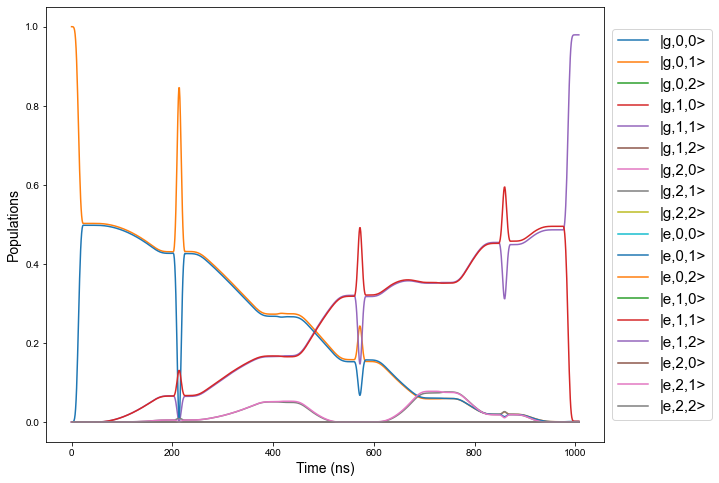

In [82]:
plot_populations(output2, 'g01 to g11_eta1Hz.png')

# Turning chi of second mode off

In [86]:
def get_hammy(eta, chi_2): 
    '''
    get hamiltonian for system with specified eta
    '''
    
    # Displace Frame hammy
    H0_disp = ((chi/2)*tensor(sigmaz(), num_c, identity_c) # first mode -qubit
            +
          (chi_2/2)*tensor(sigmaz(), identity_c, num_c) # 2nd mode - qubit
           +
          (eta)*tensor(identity_q, num_c, num_c)) # MODE-MODE
    
    # prepping time depedent hammys
    alpha_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha])
    
    H = [H0_disp,
         #Qubit drive
        [tensor(a_q, identity_c, identity_c), np.conjugate(qubit_dac_pulse_GHz)], 
         [tensor(adag_q, identity_c, identity_c), qubit_dac_pulse_GHz],

         # Desired Displacement term from qubit-mode coupling
         [(chi/2)*tensor(sigmaz(), a_c, identity_c), alpha_star],  
         [(chi/2)*tensor(sigmaz(), adag_c, identity_c), alpha],

         # UnDesired Displacement term from mode-mode coupling
         [(eta)*tensor(identity_q, a_c, num_c), alpha_star],  
         [(eta)*tensor(identity_q, adag_c, num_c), alpha],

         # Undesired alpha^2 terms
          [(chi/2)*tensor(sigmaz(), identity_c, identity_c), alpha_sq],
         [(eta)*tensor(identity_q, identity_c, num_c), alpha_sq]
         ]
    return H

In [87]:
def get_fidelity(eta, chi_2):
    """
    With specified eta, we return the overlap between final state after unitary 
    dynamics and the target state
    """
    H = get_hammy(eta, chi_2)
    psi0 = tensor(basis(n_q,0), basis(n_c,0), basis(n_c,1))
    opts = Options(store_states=True, store_final_state=True, nsteps = 5000)
    output = mesolve(H, psi0 , times, c_ops, [], options =opts)
    rho = output.states[-1]
    
    target_state = tensor(basis(n_q,0), basis(n_c, 1), basis(n_c, 1))
    fidelity = np.absolute(rho.overlap(target_state))
    print('Eta is ' + str(eta) + ' and fidelity is ' + str(fidelity))
    print(rho.overlap(target_state))
    
    return fidelity 

In [90]:
etas = [i*(10**-9) for i in range(10)] #Hz in GHz units
chis = [i*2*pi*(10**-6) for i in range(10)] #kHz in GHz units 

fids = []
for chi in chis: 
    for eta in etas: 
        fids.append(get_fidelity(eta, chi))
        print(fids[-1])

Eta is 0.0 and fidelity is 0.0
0j
0.0
Eta is 1e-09 and fidelity is 1.1073563282116465e-09
(1.0911156528136339e-09+1.8895679351496526e-10j)
1.1073563282116465e-09
Eta is 2e-09 and fidelity is 1.8977223717671493e-09
(-1.504943830511127e-09+1.1560684526930189e-09j)
1.8977223717671493e-09
Eta is 3.0000000000000004e-09 and fidelity is 1.2952469273122654e-09
(1.2715434086499461e-09+2.466616359119129e-10j)
1.2952469273122654e-09
Eta is 4e-09 and fidelity is 1.1610719385024937e-09
(1.1475008734338014e-09-1.7700223684067108e-10j)
1.1610719385024937e-09
Eta is 5e-09 and fidelity is 2.2105125816879537e-10
(1.979522382930261e-10-9.837972399223545e-11j)
2.2105125816879537e-10
Eta is 6.000000000000001e-09 and fidelity is 1.3219089619857868e-09
(1.8724568167507506e-10-1.3085802835410509e-09j)
1.3219089619857868e-09
Eta is 7.000000000000001e-09 and fidelity is 5.687939446462081e-10
(1.74810904394292e-10+5.412649066501941e-10j)
5.687939446462081e-10
Eta is 8e-09 and fidelity is 1.3727149280652003e-09
(

Eta is 7.000000000000001e-09 and fidelity is 0.04682434044342084
(-0.04680377556253615+0.0013876062312919884j)
0.04682434044342084
Eta is 8e-09 and fidelity is 0.04682434044147916
(-0.0468043526229674+0.00136800340806055j)
0.04682434044147916
Eta is 9.000000000000001e-09 and fidelity is 0.04682434017822097
(-0.04680492121191753+0.0013484003381604112j)
0.04682434017822097
Eta is 0.0 and fidelity is 0.05462012097861762
(-0.054590931917963735+0.0017854321737530692j)
0.05462012097861762
Eta is 1e-09 and fidelity is 0.05462012111407323
(-0.05459167498539808+0.0017625699432050619j)
0.05462012111407323
Eta is 2e-09 and fidelity is 0.05462012096316852
(-0.05459240819118594+0.0017397074231305064j)
0.05462012096316852
Eta is 3.0000000000000004e-09 and fidelity is 0.05462012083057266
(-0.054593131839502596+0.0017168446350923432j)
0.05462012083057266
Eta is 4e-09 and fidelity is 0.054620120711633836
(-0.05459384592544698+0.0016939815884500526j)
0.054620120711633836
Eta is 5e-09 and fidelity is 0.0

Eta is 0 and fidelity is 0.0702029989624121
(-0.07016468848424363+0.002318955201267111j)
Eta is 0 and fidelity is 0.0701995984506399
(-0.07016157201579223+0.0023102889221663565j)
Eta is 0 and fidelity is 0.07019748154753154
(-0.07015972022215482+0.002302188950757811j)
Eta is 0 and fidelity is 0.07019884372427067
(-0.07016134858469338+0.0022940847852074044j)
Eta is 0 and fidelity is 0.07019840980281707
(-0.07016118075492199+0.002285925177998331j)
Eta is 0 and fidelity is 0.07019833977503274
(-0.07016137233239357+0.0022778805074416477j)
Eta is 0 and fidelity is 0.07019831280225519
(-0.0701616105991633+0.0022696956656436396j)
Eta is 0 and fidelity is 0.07019824824869035
(-0.07016180978067507+0.002261527246160297j)
Eta is 0 and fidelity is 0.07019835068327994
(-0.07016218022347864+0.00225319882408358j)
Eta is 0 and fidelity is 0.07019822217346025
(-0.0701623143341483+0.002245004140454019j)


Text(0, 0.5, 'Fidelity')

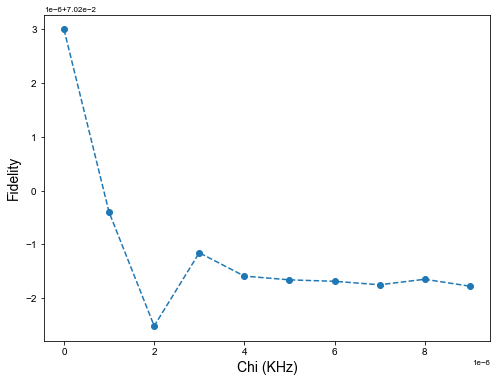

In [91]:
chis = [i*2*pi*(10**-6) for i in range(10)] #kHz in GHz units 
fids = [get_fidelity(0,chi_2) for chi_2 in chis]

fig = plt.figure(figsize=(8,6))
plt.plot([eta*(10**3) for eta in etas], fids, linestyle = '--', marker = 'o')

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.xlabel("Chi (KHz)", fontsize = 14)
plt.ylabel("Fidelity", fontsize = 14)

Eta is 1e-09 and fidelity is 0.07020299883353365
(-0.07016565323570417+0.0022895744644021326j)
Eta is 1e-09 and fidelity is 0.07019820602898935
(-0.07016348583503551+0.0022075744982237465j)
Eta is 1e-09 and fidelity is 0.07019805252532667
(-0.0701658656983991+0.0021255279679983693j)
Eta is 1e-09 and fidelity is 0.07019787681155758
(-0.07016813389399733+0.002043255902885598j)
Eta is 1e-09 and fidelity is 0.07019767901109755
(-0.07017028963565794+0.0019607628599507434j)
Eta is 1e-09 and fidelity is 0.07019745813449293
(-0.07017233116122865+0.0018780489724036578j)
Eta is 1e-09 and fidelity is 0.07019724744599683
(-0.07017429104501934+0.0017951115072403054j)
Eta is 1e-09 and fidelity is 0.07019697970568259
(-0.07017610134939878+0.0017119460268723873j)
Eta is 1e-09 and fidelity is 0.07019668726281163
(-0.07017779356106714+0.0016285556709010993j)
Eta is 1e-09 and fidelity is 0.07019646969870216
(-0.07017946666310533+0.0015449326985013453j)


Text(0, 0.5, 'Fidelity')

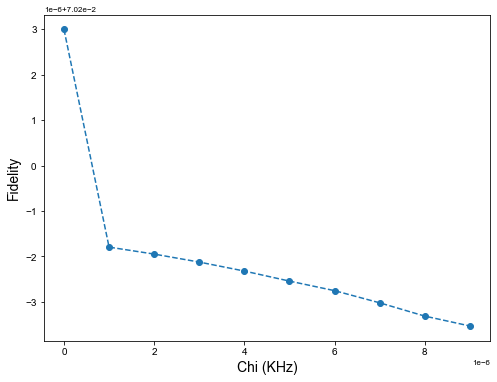

In [93]:
chis = [i*10*2*pi*(10**-6) for i in range(10)] #kHz in GHz units 
fids = [get_fidelity(10**-9,chi_2) for chi_2 in chis]

fig = plt.figure(figsize=(8,6))
plt.plot([eta*(10**3) for eta in etas], fids, linestyle = '--', marker = 'o')

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.xlabel("Chi (KHz)", fontsize = 14)
plt.ylabel("Fidelity", fontsize = 14)

In [94]:
chi

9e-06

In [95]:
chis[0]

0.0